In [1]:
!pip install ultralytics opencv-python matplotlib pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.0/883.0 kB 24.3 MB/s eta 0:00:00


In [2]:
import cv2
import os
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
!unzip /content/test.zip
!unzip /content/4_sample.zip

Archive:  /content/test.zip
   creating: Inference/Images/
  inflating: Inference/Images/001336.png  
  inflating: Inference/Images/ImageFile_02d8cab9-d575-42ba-918a-34533596e006_000001489.png  
  inflating: Inference/Images/ImageFile_0a75a2a5-3118-4239-9bfd-7a3b599769b2_000002121.png  
  inflating: Inference/Images/ImageFile_0a8f991d-8d12-416e-ba05-b19d8296bdce_000000541.png  
  inflating: Inference/Images/ImageFile_0b465b46-2221-4565-9276-c2de8dcb68f3_000000981.png  
  inflating: Inference/Images/ImageFile_0e080883-8fab-4ec6-af22-e945470efee6_000001767.png  
  inflating: Inference/Images/ImageFile_0ed3b649-650b-4ec0-b630-1eaf41872b1d_000001883.png  
  inflating: Inference/Images/ImageFile_0f5e78ea-8d52-4827-81a1-78968f212abb_000000133.png  
  inflating: Inference/Images/ImageFile_0fc7be8c-f642-4887-ae54-38e2ff028107_000000959.png  
  inflating: Inference/Images/ImageFile_10e26b66-db13-43d6-b569-ca7da15ed4c1_000002317.png  
  inflating: Inference/Images/ImageFile_1a51196c-98e0-44fa-b9

In [4]:
# Load the YOLOv8 model
model = YOLO('/content/Inference/Models/YOLOv8.pt')  # You can replace 'yolov8n.pt' with the model you want to use


0: 352x640 (no detections), 33.6ms
1: 352x640 (no detections), 33.6ms
2: 352x640 (no detections), 33.6ms
3: 352x640 (no detections), 33.6ms
Speed: 7.2ms preprocess, 33.6ms inference, 32.1ms postprocess per image at shape (1, 3, 352, 640)


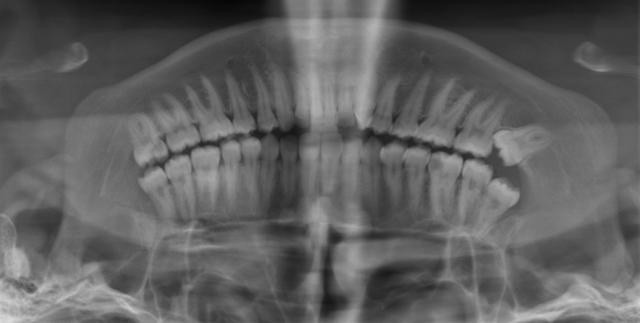

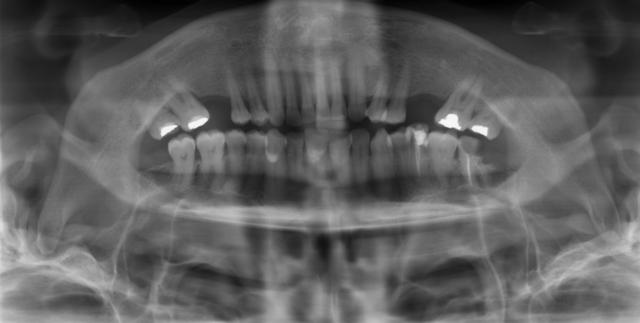

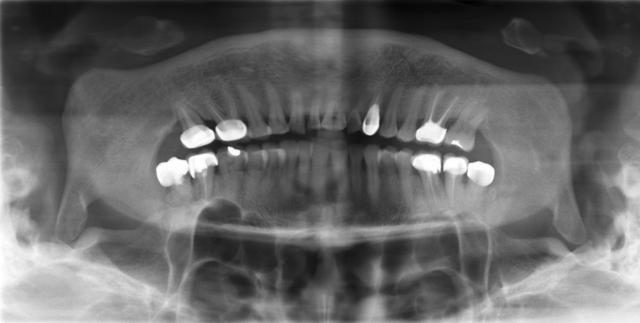

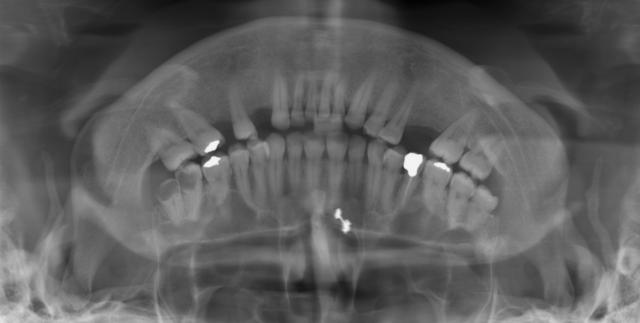

Inference complete, results saved in YOLOv8_results folder.


In [5]:
import os
from PIL import Image
from ultralytics import YOLO

# Define the path to your images and the output folder for results
image_folder = '/content/4_sample'
output_folder = '/content/YOLOv8_results'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Resize images to 300x300 and save them to a temporary list
resized_images = []
for img_file in os.listdir(image_folder):
    if img_file.endswith(('.jpg', '.jpeg', '.png')):
        # Open the image
        img_path = os.path.join(image_folder, img_file)
        img = Image.open(img_path)

        # Resize the image to 300x300
        resized_img = img.resize((640, 323))

        # Save the resized image to a temporary file in memory (or in a list)
        resized_img_path = os.path.join(image_folder, f"resized_{img_file}")
        resized_img.save(resized_img_path)

        # Append the resized image path to the list
        resized_images.append(resized_img_path)

# Perform batched inference on the resized images
results = model(resized_images)

# Get class names (this is available in the model object)
class_names = model.names  # List of class names

# Process and save results for each image
for idx, result in enumerate(results):
    # Extract bounding boxes, confidence scores, and class indices
    boxes = result.boxes  # Boxes object for bounding box outputs

    # Iterate over each detection
    for box in boxes:
        class_idx = int(box.cls.item())  # Get the class index
        confidence = box.conf.item()     # Get the confidence score
        class_name = class_names[class_idx]  # Get the class name from the class index

        # Print class name and confidence score
        print(f"Detected: {class_name} with confidence {confidence:.4f}")

    # Display the result (annotated image)
    result.show()

    # Save the annotated result to the new output folder
    result.save(filename=os.path.join(output_folder, f"result_{idx}.jpg"))  # Save results in the new folder

print("Inference complete, results saved in YOLOv8_results folder.")


In [6]:
# Load the YOLOv8 model
model = YOLO('/content/Inference/Models/YOLOv5.pt')  # You can replace 'yolov8n.pt' with the model you want to use


0: 352x640 1 Complete endodontic treatment, 1 No endodontic treatment, 1 Incomplete endodontic treatment, 1 Total endodontic failure, 23.5ms
1: 352x640 1 Complete endodontic treatment, 1 No endodontic treatment, 1 Incomplete endodontic treatment, 1 Total endodontic failure, 23.5ms
2: 352x640 2 Complete endodontic treatments, 1 No endodontic treatment, 1 Incomplete endodontic treatment, 1 Total endodontic failure, 23.5ms
3: 352x640 1 Complete endodontic treatment, 1 No endodontic treatment, 1 Incomplete endodontic treatment, 1 Total endodontic failure, 23.5ms
4: 352x640 1 Complete endodontic treatment, 1 No endodontic treatment, 1 Incomplete endodontic treatment, 1 Total endodontic failure, 23.5ms
5: 352x640 2 Complete endodontic treatments, 1 No endodontic treatment, 1 Incomplete endodontic treatment, 1 Total endodontic failure, 23.5ms
6: 352x640 1 Complete endodontic treatment, 1 No endodontic treatment, 3 Incomplete endodontic treatments, 1 Total endodontic failure, 23.5ms
7: 352x64

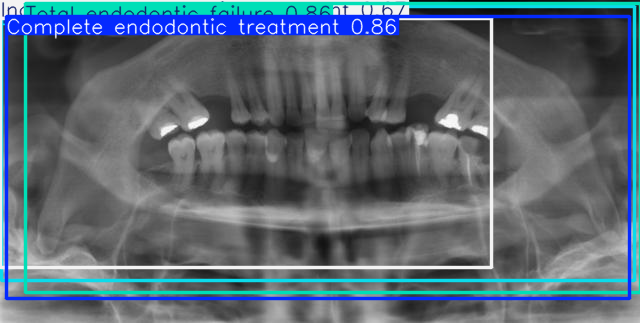

Detected: Complete endodontic treatment with confidence 0.9241
Detected: Total endodontic failure with confidence 0.9234
Detected: No endodontic treatment with confidence 0.8712
Detected: Incomplete endodontic treatment with confidence 0.7325


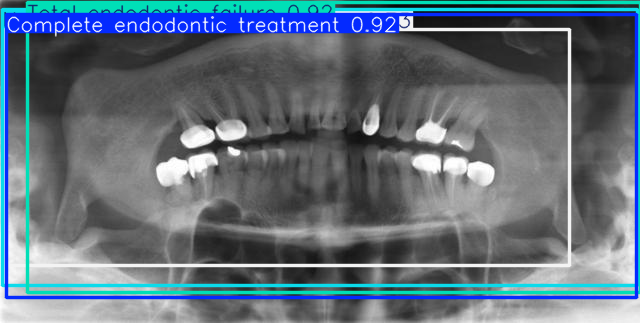

Detected: Complete endodontic treatment with confidence 0.9194
Detected: Total endodontic failure with confidence 0.8256
Detected: Complete endodontic treatment with confidence 0.8041
Detected: No endodontic treatment with confidence 0.7779
Detected: Incomplete endodontic treatment with confidence 0.7179


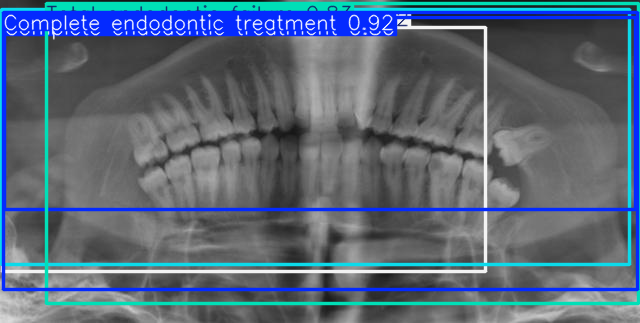

Detected: Complete endodontic treatment with confidence 0.8610
Detected: Total endodontic failure with confidence 0.8585
Detected: Incomplete endodontic treatment with confidence 0.6692
Detected: No endodontic treatment with confidence 0.5437


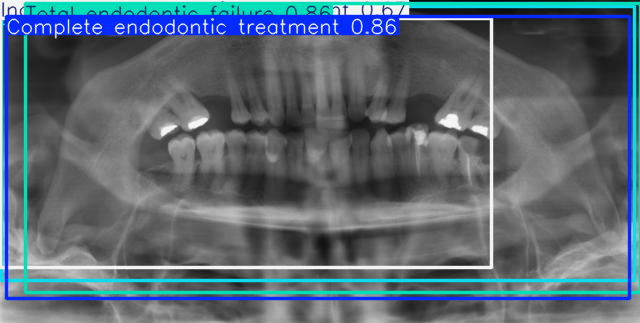

Detected: Complete endodontic treatment with confidence 0.9242
Detected: Total endodontic failure with confidence 0.9234
Detected: No endodontic treatment with confidence 0.8714
Detected: Incomplete endodontic treatment with confidence 0.7331


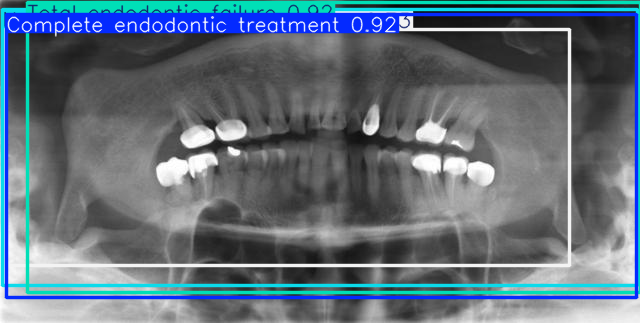

Detected: Complete endodontic treatment with confidence 0.9198
Detected: Total endodontic failure with confidence 0.8245
Detected: Complete endodontic treatment with confidence 0.8042
Detected: No endodontic treatment with confidence 0.7781
Detected: Incomplete endodontic treatment with confidence 0.7179


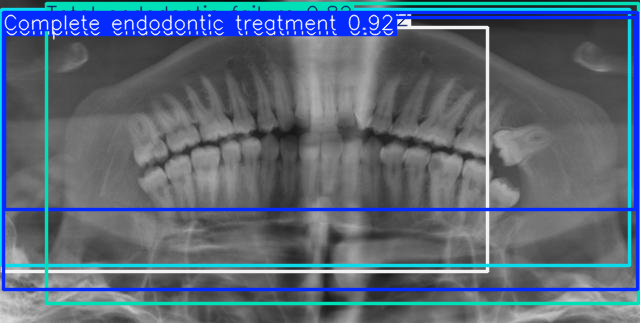

Detected: Complete endodontic treatment with confidence 0.9513
Detected: Total endodontic failure with confidence 0.8473
Detected: No endodontic treatment with confidence 0.6842
Detected: Incomplete endodontic treatment with confidence 0.4556
Detected: Incomplete endodontic treatment with confidence 0.4304
Detected: Incomplete endodontic treatment with confidence 0.4109


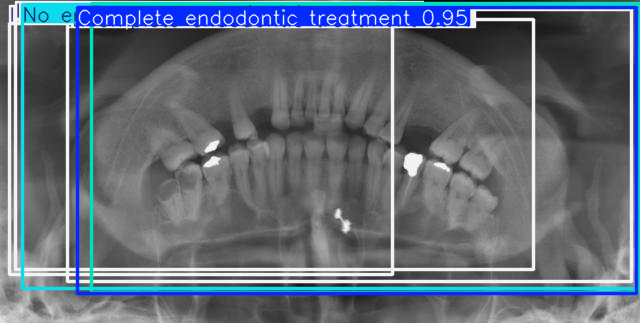

Detected: Complete endodontic treatment with confidence 0.9512
Detected: Total endodontic failure with confidence 0.8468
Detected: No endodontic treatment with confidence 0.6790
Detected: Incomplete endodontic treatment with confidence 0.4644
Detected: Incomplete endodontic treatment with confidence 0.2663


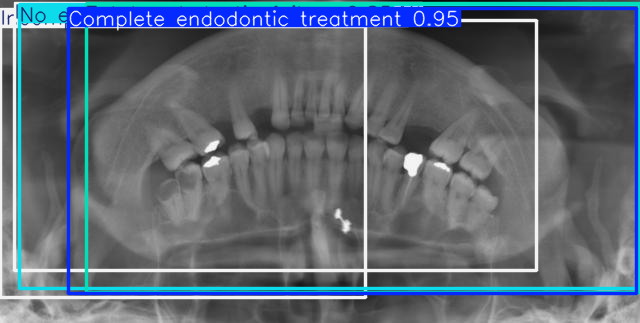

Inference complete, results saved in YOLOv8_results folder.


In [7]:
import os
from PIL import Image
from ultralytics import YOLO

# Define the path to your images and the output folder for results
image_folder = '/content/4_sample'
output_folder = '/content/YOLOv5_results_1'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Resize images to 300x300 and save them to a temporary list
resized_images = []
for img_file in os.listdir(image_folder):
    if img_file.endswith(('.jpg', '.jpeg', '.png')):
        # Open the image
        img_path = os.path.join(image_folder, img_file)
        img = Image.open(img_path)

        # Resize the image to 300x300
        resized_img = img.resize((640, 323))

        # Save the resized image to a temporary file in memory (or in a list)
        resized_img_path = os.path.join(image_folder, f"resized_{img_file}")
        resized_img.save(resized_img_path)

        # Append the resized image path to the list
        resized_images.append(resized_img_path)

# Perform batched inference on the resized images
results = model(resized_images)

# Get class names (this is available in the model object)
class_names = model.names  # List of class names

# Process and save results for each image
for idx, result in enumerate(results):
    # Extract bounding boxes, confidence scores, and class indices
    boxes = result.boxes  # Boxes object for bounding box outputs

    # Iterate over each detection
    for box in boxes:
        class_idx = int(box.cls.item())  # Get the class index
        confidence = box.conf.item()     # Get the confidence score
        class_name = class_names[class_idx]  # Get the class name from the class index

        # Print class name and confidence score
        print(f"Detected: {class_name} with confidence {confidence:.4f}")

    # Display the result (annotated image)
    result.show()

    # Save the annotated result to the new output folder
    result.save(filename=os.path.join(output_folder, f"result_{idx}.jpg"))  # Save results in the new folder

print("Inference complete, results saved in YOLOv8_results folder.")


0: 352x640 1 Complete endodontic treatment, 1 No endodontic treatment, 1 Incomplete endodontic treatment, 1 Total endodontic failure, 3.0ms
1: 352x640 1 Complete endodontic treatment, 1 No endodontic treatment, 1 Incomplete endodontic treatment, 1 Total endodontic failure, 3.0ms
2: 352x640 1 Complete endodontic treatment, 1 No endodontic treatment, 2 Incomplete endodontic treatments, 1 Total endodontic failure, 3.0ms
3: 352x640 1 Complete endodontic treatment, 1 No endodontic treatment, 1 Incomplete endodontic treatment, 1 Total endodontic failure, 3.0ms
4: 352x640 1 Complete endodontic treatment, 1 No endodontic treatment, 1 Incomplete endodontic treatment, 1 Total endodontic failure, 3.0ms
5: 352x640 1 Complete endodontic treatment, 1 No endodontic treatment, 1 Incomplete endodontic treatment, 1 Total endodontic failure, 3.0ms
6: 352x640 1 Complete endodontic treatment, 1 No endodontic treatment, 2 Incomplete endodontic treatments, 1 Total endodontic failure, 3.0ms
7: 352x640 1 Comp

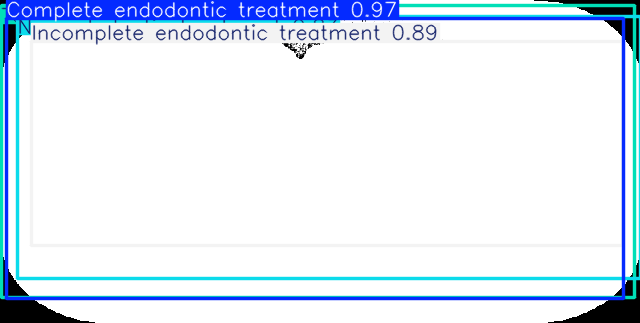

Detected: Complete endodontic treatment with confidence 0.9709
Detected: Incomplete endodontic treatment with confidence 0.8796
Detected: No endodontic treatment with confidence 0.8444
Detected: Total endodontic failure with confidence 0.7555


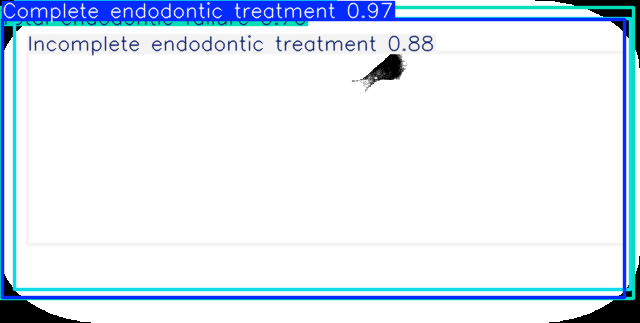

Detected: Complete endodontic treatment with confidence 0.9548
Detected: Incomplete endodontic treatment with confidence 0.8761
Detected: No endodontic treatment with confidence 0.8673
Detected: Incomplete endodontic treatment with confidence 0.6554
Detected: Total endodontic failure with confidence 0.5589


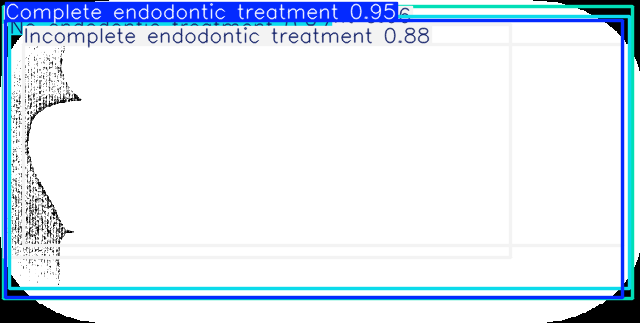

Detected: Complete endodontic treatment with confidence 0.9612
Detected: Incomplete endodontic treatment with confidence 0.9139
Detected: No endodontic treatment with confidence 0.8637
Detected: Total endodontic failure with confidence 0.5435


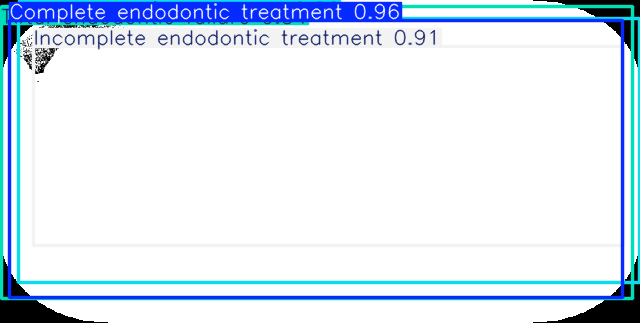

Detected: Complete endodontic treatment with confidence 0.9518
Detected: Incomplete endodontic treatment with confidence 0.8858
Detected: No endodontic treatment with confidence 0.8631
Detected: Total endodontic failure with confidence 0.6711


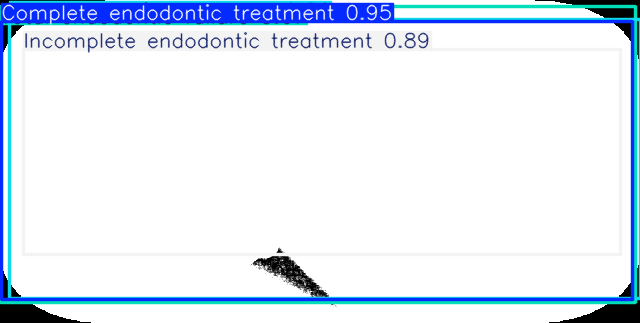

Detected: Complete endodontic treatment with confidence 0.9682
Detected: No endodontic treatment with confidence 0.8831
Detected: Incomplete endodontic treatment with confidence 0.8830
Detected: Total endodontic failure with confidence 0.5661


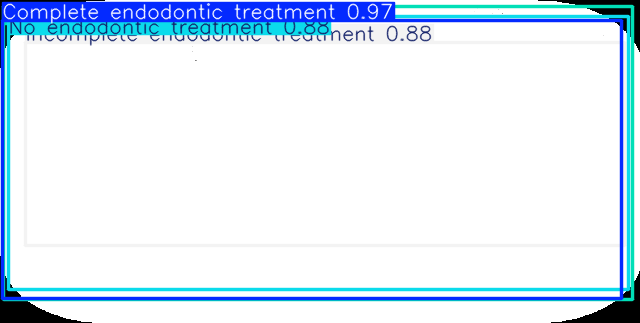

Detected: Complete endodontic treatment with confidence 0.9045
Detected: No endodontic treatment with confidence 0.8740
Detected: Incomplete endodontic treatment with confidence 0.8665
Detected: Total endodontic failure with confidence 0.7238
Detected: Incomplete endodontic treatment with confidence 0.3259


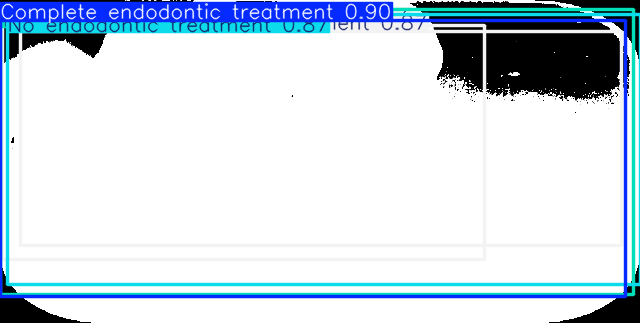

Detected: Complete endodontic treatment with confidence 0.9396
Detected: No endodontic treatment with confidence 0.8821
Detected: Incomplete endodontic treatment with confidence 0.8651
Detected: Total endodontic failure with confidence 0.5874


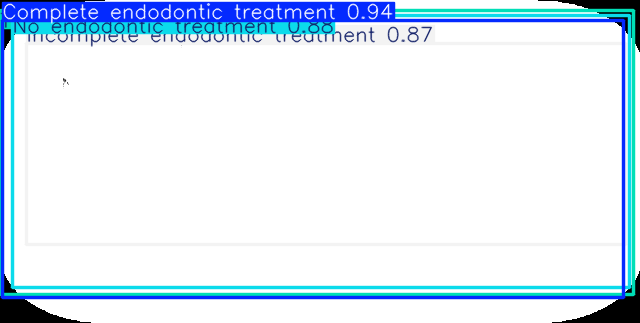

Detected: Complete endodontic treatment with confidence 0.9446
Detected: Incomplete endodontic treatment with confidence 0.8799
Detected: No endodontic treatment with confidence 0.8632
Detected: Total endodontic failure with confidence 0.6306


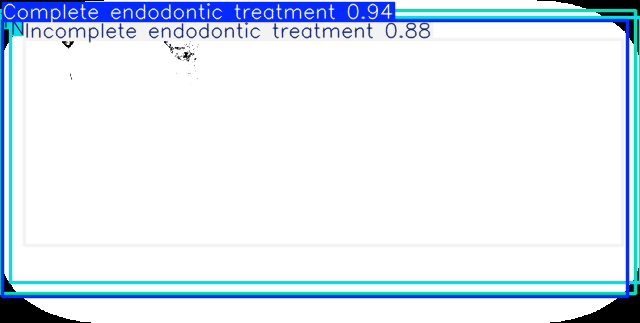

Detected: Complete endodontic treatment with confidence 0.9270
Detected: No endodontic treatment with confidence 0.8603
Detected: Incomplete endodontic treatment with confidence 0.7596
Detected: Total endodontic failure with confidence 0.5529


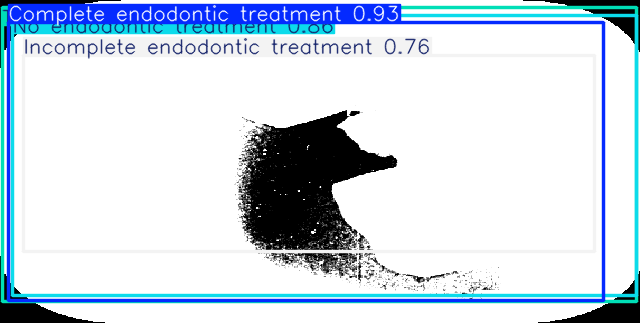

Detected: Complete endodontic treatment with confidence 0.9614
Detected: Incomplete endodontic treatment with confidence 0.8222
Detected: No endodontic treatment with confidence 0.8099
Detected: Total endodontic failure with confidence 0.6232
Detected: Incomplete endodontic treatment with confidence 0.4305


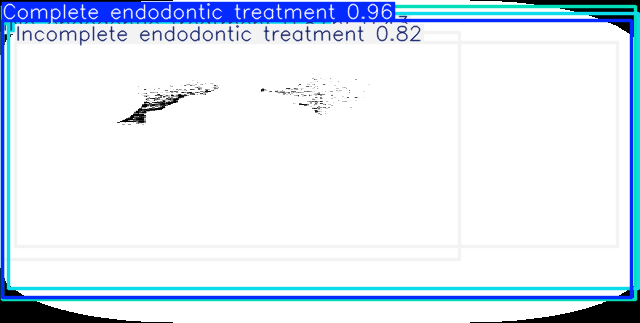

Detected: Complete endodontic treatment with confidence 0.9396
Detected: No endodontic treatment with confidence 0.8235
Detected: Total endodontic failure with confidence 0.7154
Detected: Incomplete endodontic treatment with confidence 0.3848


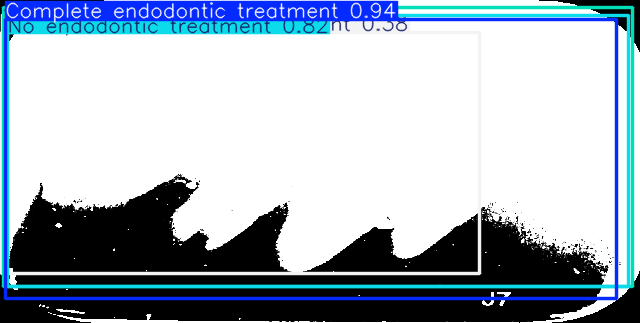

Detected: Complete endodontic treatment with confidence 0.9579
Detected: Incomplete endodontic treatment with confidence 0.9166
Detected: No endodontic treatment with confidence 0.8658
Detected: Total endodontic failure with confidence 0.6126
Detected: Incomplete endodontic treatment with confidence 0.2604


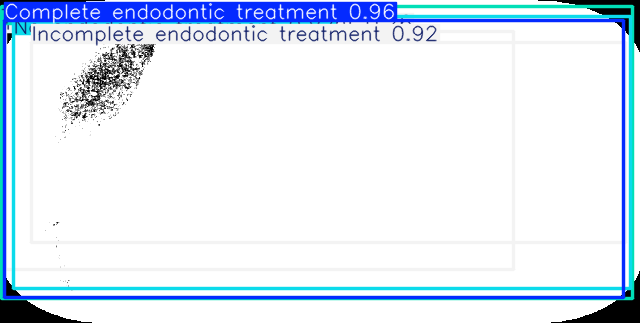

Detected: Complete endodontic treatment with confidence 0.9486
Detected: Incomplete endodontic treatment with confidence 0.8971
Detected: No endodontic treatment with confidence 0.8737
Detected: Total endodontic failure with confidence 0.5990


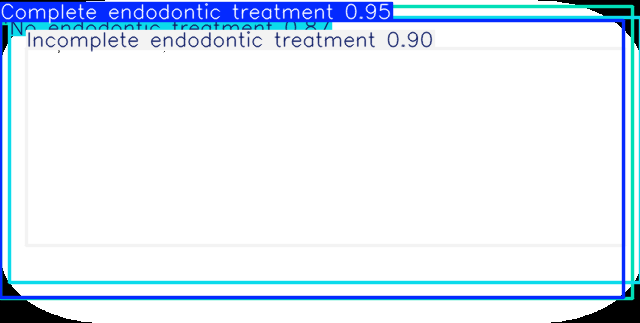

Detected: Complete endodontic treatment with confidence 0.9582
Detected: Incomplete endodontic treatment with confidence 0.9004
Detected: No endodontic treatment with confidence 0.8718
Detected: Total endodontic failure with confidence 0.5523


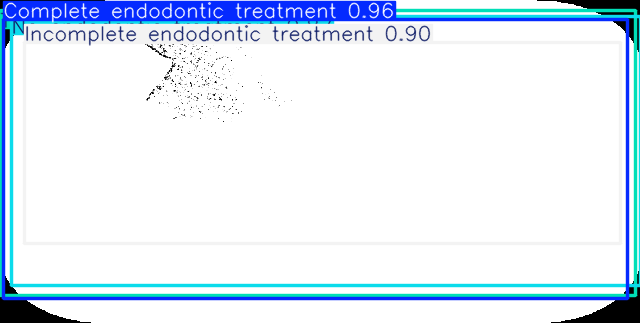

Detected: Complete endodontic treatment with confidence 0.9670
Detected: Incomplete endodontic treatment with confidence 0.8763
Detected: No endodontic treatment with confidence 0.8643
Detected: Total endodontic failure with confidence 0.6141


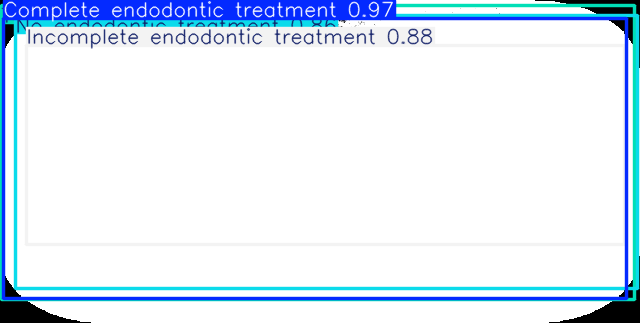

Detected: Complete endodontic treatment with confidence 0.9365
Detected: No endodontic treatment with confidence 0.8873
Detected: Incomplete endodontic treatment with confidence 0.8825
Detected: Total endodontic failure with confidence 0.6104


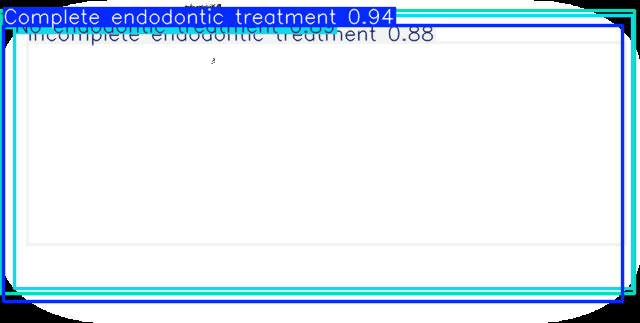

Detected: Complete endodontic treatment with confidence 0.9514
Detected: Incomplete endodontic treatment with confidence 0.8963
Detected: No endodontic treatment with confidence 0.8768
Detected: Total endodontic failure with confidence 0.5509


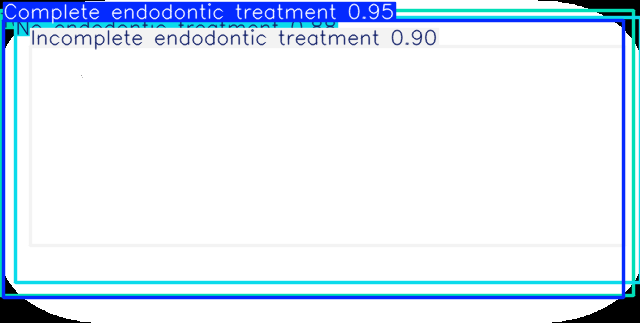

Detected: Complete endodontic treatment with confidence 0.9493
Detected: Incomplete endodontic treatment with confidence 0.8971
Detected: No endodontic treatment with confidence 0.8605
Detected: Total endodontic failure with confidence 0.5651


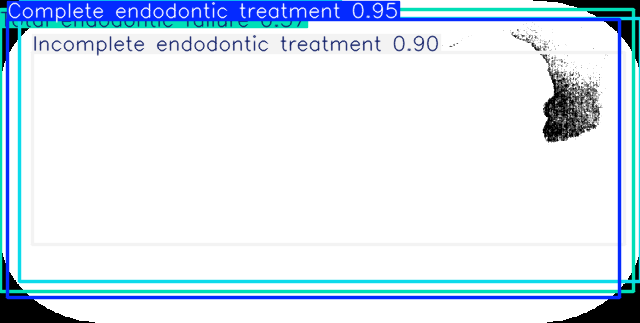

Detected: Complete endodontic treatment with confidence 0.9607
Detected: Incomplete endodontic treatment with confidence 0.8397
Detected: No endodontic treatment with confidence 0.8235
Detected: Total endodontic failure with confidence 0.7448


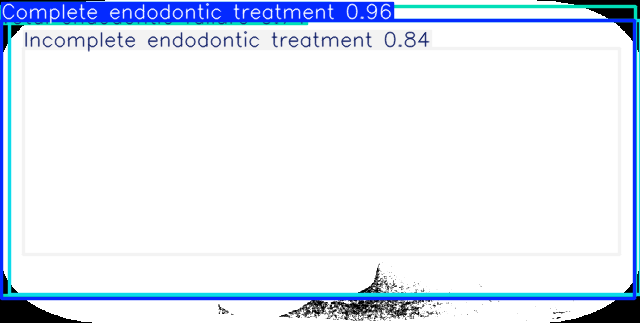

Detected: Total endodontic failure with confidence 0.6628
Detected: Complete endodontic treatment with confidence 0.3156


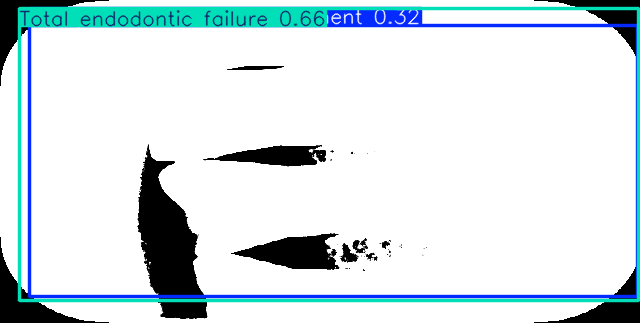

Detected: Complete endodontic treatment with confidence 0.9223
Detected: No endodontic treatment with confidence 0.8434
Detected: Incomplete endodontic treatment with confidence 0.8123
Detected: Total endodontic failure with confidence 0.6487
Detected: Incomplete endodontic treatment with confidence 0.3360


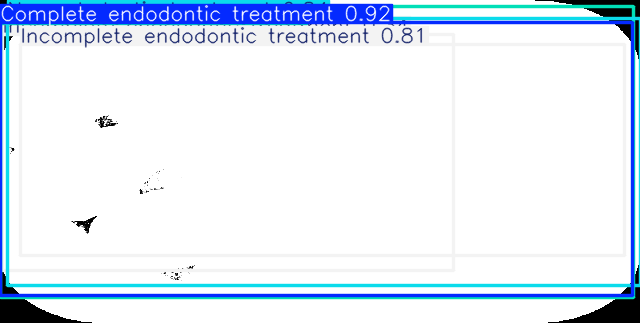

Detected: Complete endodontic treatment with confidence 0.9444
Detected: No endodontic treatment with confidence 0.8838
Detected: Incomplete endodontic treatment with confidence 0.8701
Detected: Total endodontic failure with confidence 0.6774


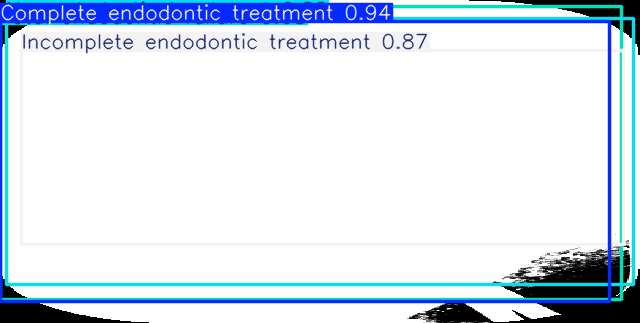

Detected: Complete endodontic treatment with confidence 0.9534
Detected: No endodontic treatment with confidence 0.8823
Detected: Incomplete endodontic treatment with confidence 0.8560
Detected: Total endodontic failure with confidence 0.5637


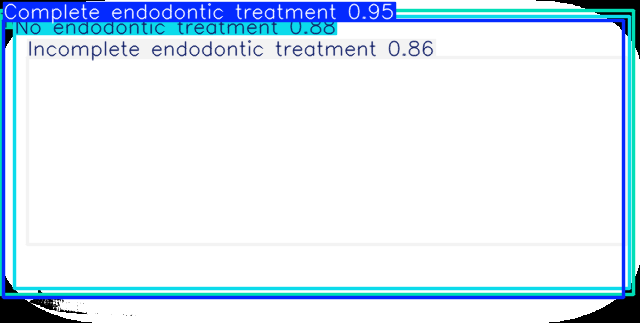

Detected: Complete endodontic treatment with confidence 0.9749
Detected: Incomplete endodontic treatment with confidence 0.8914
Detected: No endodontic treatment with confidence 0.8642
Detected: Total endodontic failure with confidence 0.8538


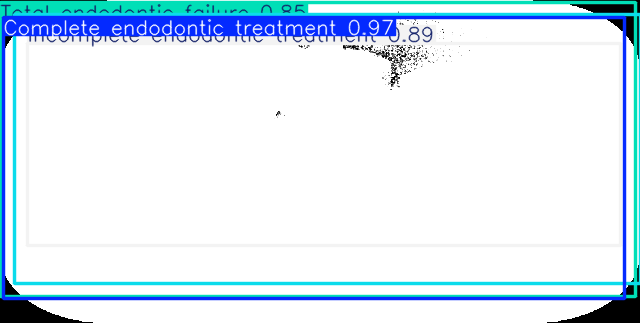

Detected: Complete endodontic treatment with confidence 0.9451
Detected: Incomplete endodontic treatment with confidence 0.9122
Detected: No endodontic treatment with confidence 0.8703
Detected: Total endodontic failure with confidence 0.5596


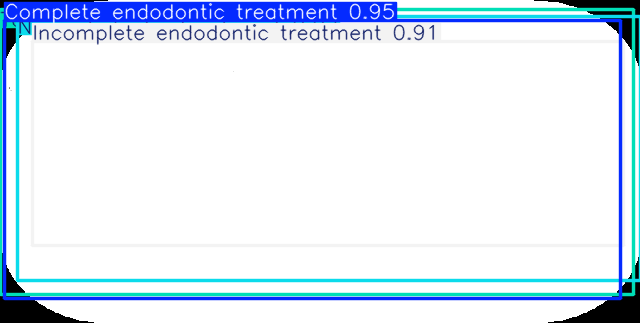

Detected: Complete endodontic treatment with confidence 0.9571
Detected: No endodontic treatment with confidence 0.8472
Detected: Incomplete endodontic treatment with confidence 0.8124
Detected: Total endodontic failure with confidence 0.7838


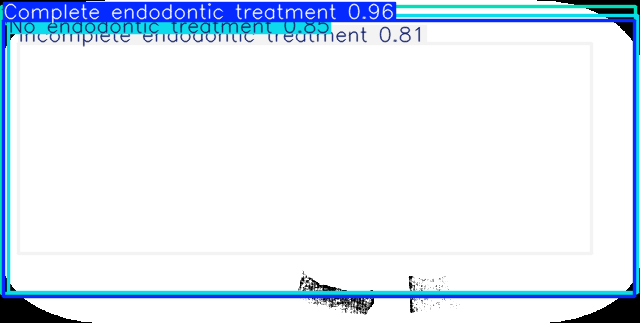

Detected: Complete endodontic treatment with confidence 0.9447
Detected: Incomplete endodontic treatment with confidence 0.8806
Detected: No endodontic treatment with confidence 0.8799
Detected: Total endodontic failure with confidence 0.5691


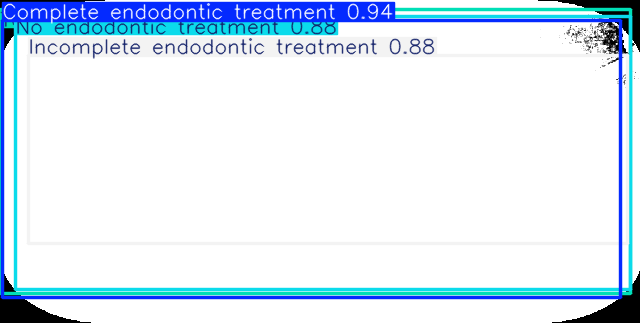

Detected: Complete endodontic treatment with confidence 0.9471
Detected: No endodontic treatment with confidence 0.8761
Detected: Incomplete endodontic treatment with confidence 0.8271
Detected: Total endodontic failure with confidence 0.5842


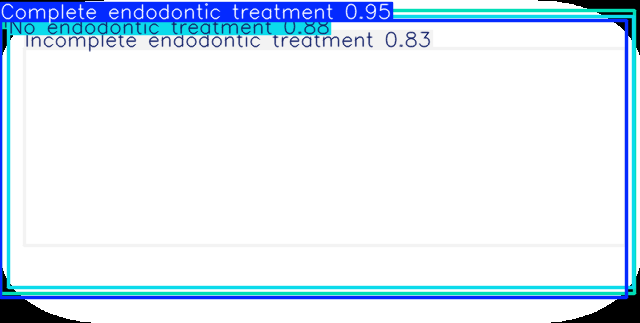

Detected: Complete endodontic treatment with confidence 0.9210
Detected: No endodontic treatment with confidence 0.8673
Detected: Incomplete endodontic treatment with confidence 0.8616
Detected: Total endodontic failure with confidence 0.8357


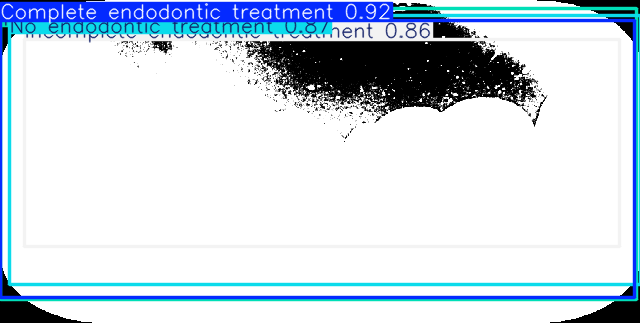

Detected: Complete endodontic treatment with confidence 0.9395
Detected: No endodontic treatment with confidence 0.8501
Detected: Incomplete endodontic treatment with confidence 0.8361
Detected: Total endodontic failure with confidence 0.7026


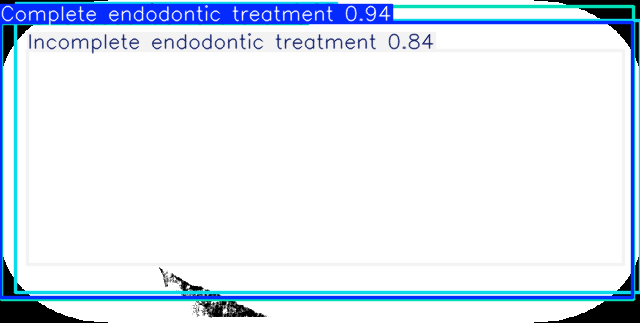

Detected: Complete endodontic treatment with confidence 0.9479
Detected: Incomplete endodontic treatment with confidence 0.8871
Detected: No endodontic treatment with confidence 0.8716
Detected: Total endodontic failure with confidence 0.5737


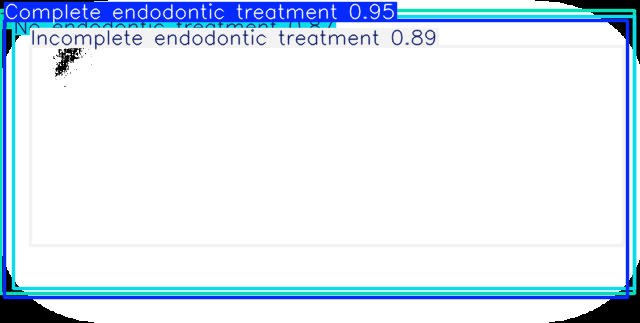

Detected: Complete endodontic treatment with confidence 0.9342
Detected: Incomplete endodontic treatment with confidence 0.8622
Detected: No endodontic treatment with confidence 0.8313
Detected: Total endodontic failure with confidence 0.6637


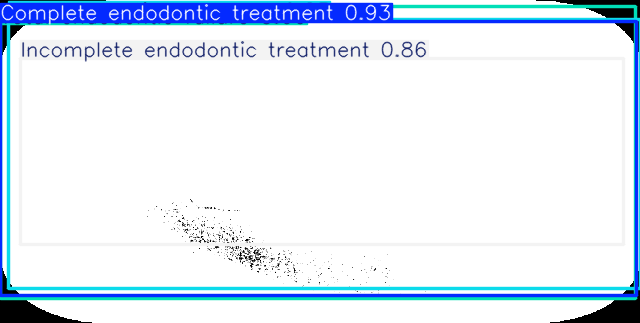

Detected: Complete endodontic treatment with confidence 0.9346
Detected: Incomplete endodontic treatment with confidence 0.9056
Detected: No endodontic treatment with confidence 0.8574
Detected: Total endodontic failure with confidence 0.6439


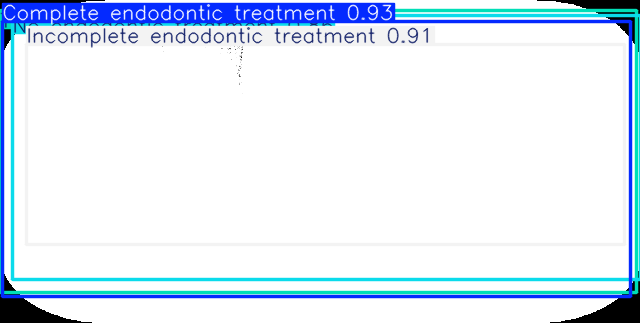

Detected: Complete endodontic treatment with confidence 0.9504
Detected: Incomplete endodontic treatment with confidence 0.8819
Detected: No endodontic treatment with confidence 0.8604
Detected: Total endodontic failure with confidence 0.6168
Detected: Incomplete endodontic treatment with confidence 0.2634


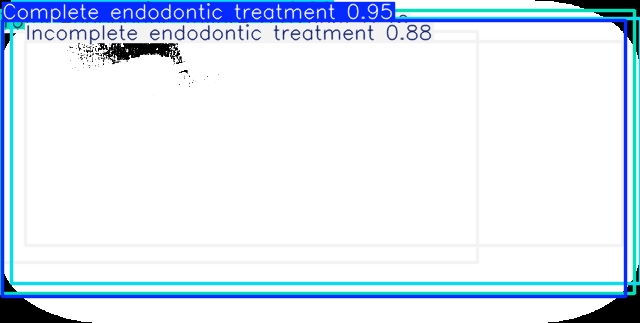

Detected: Complete endodontic treatment with confidence 0.9573
Detected: No endodontic treatment with confidence 0.8782
Detected: Incomplete endodontic treatment with confidence 0.8680
Detected: Total endodontic failure with confidence 0.5622


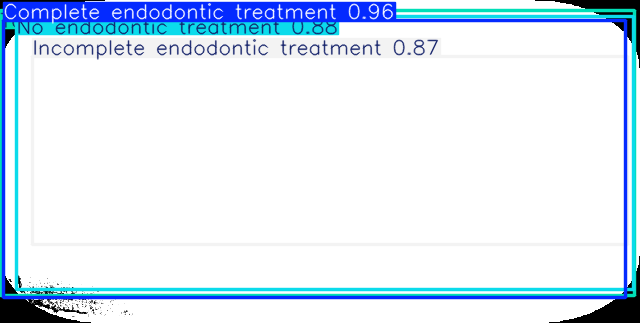

Detected: Complete endodontic treatment with confidence 0.9621
Detected: Incomplete endodontic treatment with confidence 0.8841
Detected: No endodontic treatment with confidence 0.8353
Detected: Total endodontic failure with confidence 0.6006
Detected: Incomplete endodontic treatment with confidence 0.2851


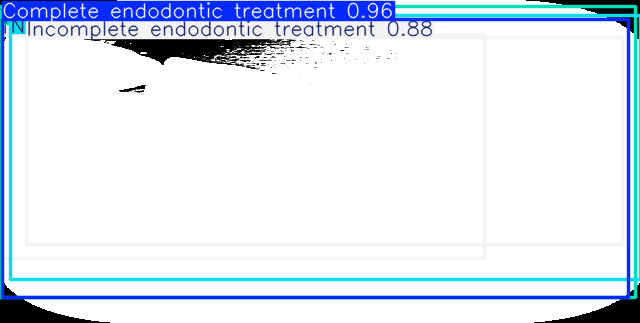

Detected: Complete endodontic treatment with confidence 0.9548
Detected: No endodontic treatment with confidence 0.7544
Detected: Incomplete endodontic treatment with confidence 0.7378
Detected: Total endodontic failure with confidence 0.6113
Detected: Incomplete endodontic treatment with confidence 0.3435


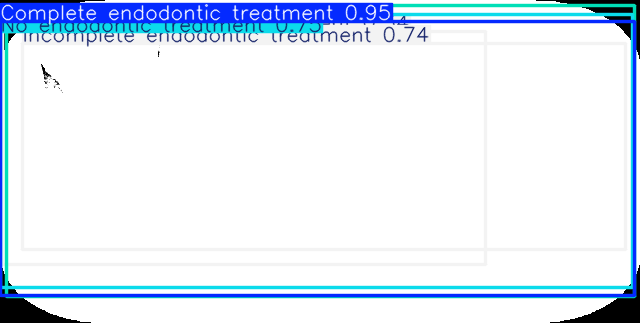

Detected: Complete endodontic treatment with confidence 0.9304
Detected: Incomplete endodontic treatment with confidence 0.8868
Detected: No endodontic treatment with confidence 0.8572
Detected: Total endodontic failure with confidence 0.5972


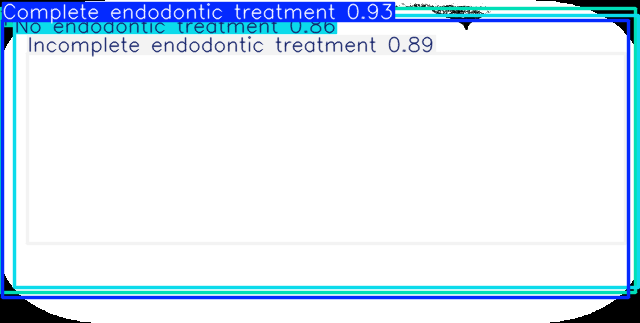

Detected: Complete endodontic treatment with confidence 0.9524
Detected: Incomplete endodontic treatment with confidence 0.8885
Detected: No endodontic treatment with confidence 0.8658
Detected: Total endodontic failure with confidence 0.6276


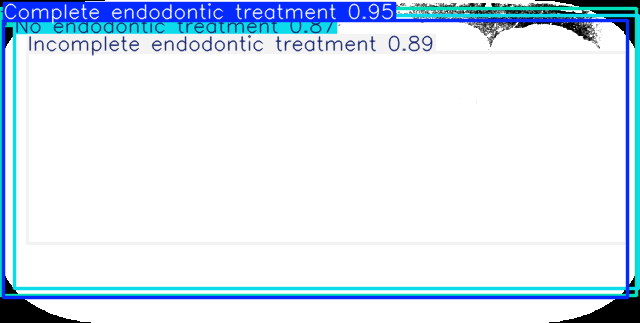

Inference complete, results saved in YOLOv8_results folder.


In [8]:
import os
from PIL import Image
from ultralytics import YOLO

# Define the path to your images and the output folder for results
image_folder = '/content/Inference/Images'
output_folder = '/content/YOLOv5_results_2'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Resize images to 300x300 and save them to a temporary list
resized_images = []
for img_file in os.listdir(image_folder):
    if img_file.endswith(('.jpg', '.jpeg', '.png')):
        # Open the image
        img_path = os.path.join(image_folder, img_file)
        img = Image.open(img_path)

        # Resize the image to 300x300
        resized_img = img.resize((640, 323))

        # Save the resized image to a temporary file in memory (or in a list)
        resized_img_path = os.path.join(image_folder, f"resized_{img_file}")
        resized_img.save(resized_img_path)

        # Append the resized image path to the list
        resized_images.append(resized_img_path)

# Perform batched inference on the resized images
results = model(resized_images)

# Get class names (this is available in the model object)
class_names = model.names  # List of class names

# Process and save results for each image
for idx, result in enumerate(results):
    # Extract bounding boxes, confidence scores, and class indices
    boxes = result.boxes  # Boxes object for bounding box outputs

    # Iterate over each detection
    for box in boxes:
        class_idx = int(box.cls.item())  # Get the class index
        confidence = box.conf.item()     # Get the confidence score
        class_name = class_names[class_idx]  # Get the class name from the class index

        # Print class name and confidence score
        print(f"Detected: {class_name} with confidence {confidence:.4f}")

    # Display the result (annotated image)
    result.show()

    # Save the annotated result to the new output folder
    result.save(filename=os.path.join(output_folder, f"result_{idx}.jpg"))  # Save results in the new folder

print("Inference complete, results saved in YOLOv8_results folder.")

In [9]:
import shutil
from google.colab import files

# Define the folder path you want to zip
folder_to_zip = '/content/YOLOv5_results_1'
zip_file_name = '/content/YOLOv5_results_1.zip'

# Create a zip file
shutil.make_archive(zip_file_name.replace('.zip', ''), 'zip', folder_to_zip)

# Download the zip file
files.download(zip_file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
import shutil
from google.colab import files

# Define the folder path you want to zip
folder_to_zip = '/content/YOLOv5_results_2'
zip_file_name = '/content/YOLOv5_results_2.zip'

# Create a zip file
shutil.make_archive(zip_file_name.replace('.zip', ''), 'zip', folder_to_zip)

# Download the zip file
files.download(zip_file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>